In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv('/content/sample_data/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#missing data


In [51]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


#outliers


<Axes: ylabel='Age'>

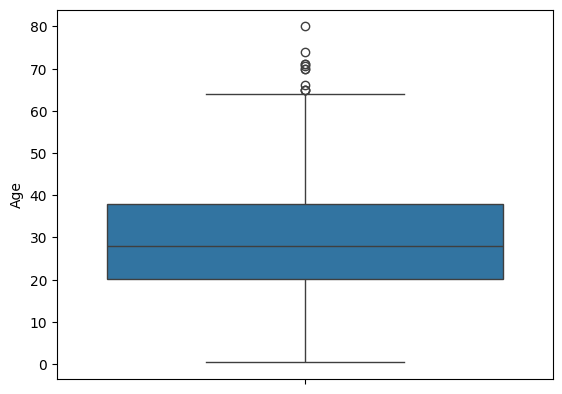

In [52]:
sns.boxplot(df['Age'])

#fill null values with median as it contains outliers and mode for frequent most values

In [53]:
df["Age"] = df["Age"].astype(float).fillna(df["Age"].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()).iloc[0]

In [54]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


#Dropping column Cabin as it contains many null values

In [55]:
df = df.drop(columns=["Cabin"], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


#Survival Rate

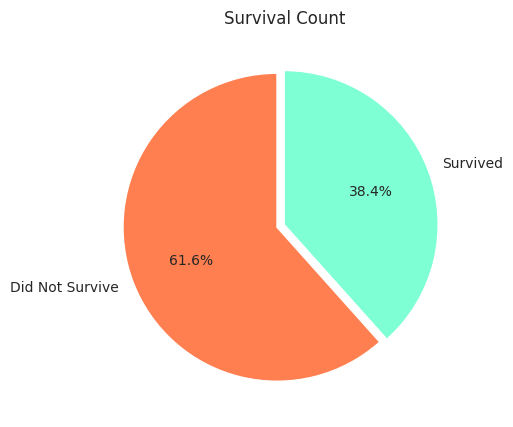

In [87]:
plt.figure(figsize=(5,5))
s_c = df["Survived"].value_counts()
l= ['Did Not Survive','Survived']
plt.pie(s_c,labels=l, autopct='%1.1f%%', colors=['coral', 'aquamarine'], startangle=90, explode=[0.05, 0])
plt.title("Survival Count")
plt.show()

Insights

In [ ]:
# If the survival rate is low, it suggests that a majority of passengers did not survive.
# If survival is close to 50-50, external factors (class, gender, age) may have played a role.
# Comparing survival percentages between different groups helps in understanding patterns.

#Passenger Distribution

<ipython-input-76-5d20f52680f3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Pclass" , data=df ,palette="muted")


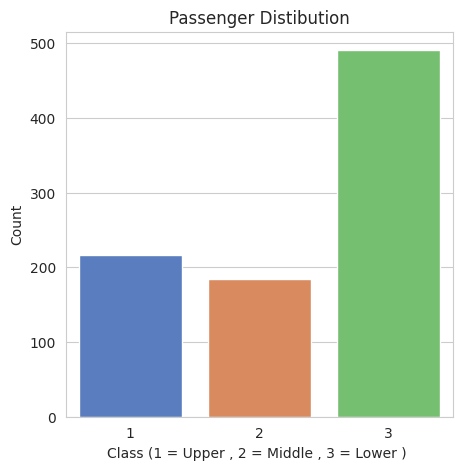

In [76]:
plt.figure(figsize=(5,5))
sns.countplot(x="Pclass" , data=df ,palette="muted")
plt.xlabel("Class (1 = Upper , 2 = Middle , 3 = Lower ) ")
plt.ylabel("Count")
plt.title("Passenger Distibution")
plt.show()

Insights

In [ ]:
# If 1st class has fewer passengers, it suggests wealthier individuals were fewer.
# If 3rd class has the most passengers, it means the ship carried more low-class travelers.

#Age Distribution

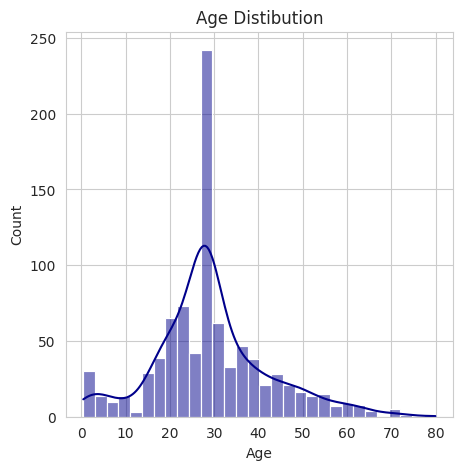

In [77]:
plt.figure(figsize=(5,5))
sns.histplot(x="Age" , kde=True, data=df ,color="Darkblue",bins=30)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distibution")
plt.show()

Insights

In [ ]:
# This chart helps visualize the age range of passengers.
# If the distribution is right-skewed, there were more young passengers.
# If there are peaks, it indicates common age groups (e.g., children, adults).

#Age vs Survival

<ipython-input-78-163baaadf3a3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Survived", y="Age", data=df, palette="coolwarm")


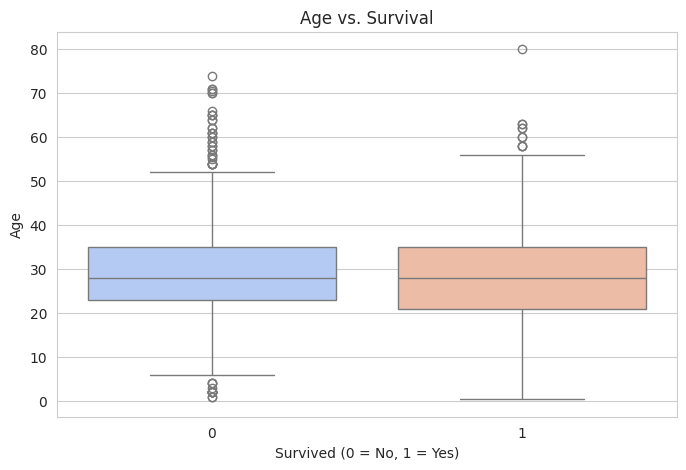

In [78]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Survived", y="Age", data=df, palette="coolwarm")
plt.title("Age vs. Survival")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

Insights

In [ ]:
# If younger passengers have higher survival rates, it supports the "save children first" rule.
# If older passengers have lower survival, it might be due to physical ability during evacuation.

#Gender vs Survival

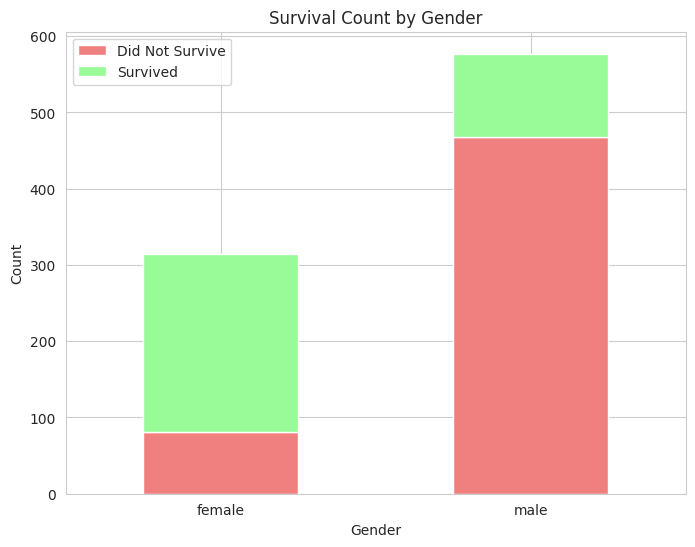

In [88]:
gender_survival = df.groupby("Sex")["Survived"].value_counts().unstack()
gender_survival.plot(kind="bar", stacked=True, figsize=(8,6), color=['lightcoral', 'palegreen'])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Survival Count by Gender")
plt.legend(["Did Not Survive", "Survived"])
plt.xticks(rotation=0)
plt.show()

Insights

In [ ]:
# If female survival is much higher, it confirms the "Women and children first" policy.
# If males had a higher death rate, it supports historical records of the Titanic.